In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs


In [38]:
link="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [39]:
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [40]:
review_list

['Design – A Familiar Face With a Dash of NewLet’s start with the design. Users of older Oneplus phones will instantly recognize the front side of the phone. It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T. And honestly, it doesn’t bother me at all. A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.But here’s the big twist- rounded triple-camera layout. Remember Motorola? That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help. At its best, it helps in distinguishing itself from the rest of the lineup. At worst, it sticks out, literally, like a sore thumb. That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”The phone sports a single USB-C port which is used for charging using Warp CHarge 30T. The latest update t

In [41]:
len(review_list)

10

In [42]:
rv=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
rv

,Reviews
0,"Design – A Familiar Face With a Dash of NewLet’s start with the design. Users of older Oneplus phones will instantly recognize the front side of the phone. It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T. And honestly, it doesn’t bother me at all. A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.But here’s the big twist- rounded triple-camera layout. Remember Motorola? That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help. At its best, it helps in distinguishing itself from the rest of the lineup. At worst, it sticks out, literally, like a sore thumb. That’s not to say that I haven’t grown into it, but given the Oneplus 7..."
1,"I had been using Mi for the past 4 years. Loved the software experience there but I knew something was lacking on the hardware end.I decided to switch over to some real flagship grade phone around the 40K mark like S10e or Pixel 3a and I had almost bought either one, just when the pics of the OnePlus 7T were teased online by OnePlus.The design of the OP7T had my attention immediately ! And I decided to wait for it.Not much review and comparison videos for the 7T were available before the first sale , but blown away by the sheer looks of 7T, I instantly bought the OnePlus 7T as soon as it went on sale on 28th and trust me I will never regret my decision to choose OnePlus.I will now classify this review category wise:-DESIGN: The design looks fabulous. Elegant is the right word for the..."
2,"OnePlus 7T is an excellent device and different from OnePlus 7 and could have been named as 8 instead of 7T.But THIS CANNOT BEAT OnePlus 7 Pro. Read below the Pros, mids, cons, and verdict.PROS (POSITIVES):1) Design: OnePlus 7 was not at all looking premium. But this time, the 7T is a mastered design piece. Earlier the camera bump was very ugly. Now it looks very beautiful due to its circular placement. And it looks very premium due to matte-finish and well suited for all kinds of people.2) Weight & thickness: The device doesn't feel heavy at all due to balanced weight management and it is very easy to handle due to slim 8.1 mm thickness.3) Processor: This device hosts the world's fastest processor - Snapdragon 855+ chipset processor. So everything is butter-smooth. This has been alway..."
3,"Using this device since it launched i.e from October 2019.Short review- I can confidently say that even for 2020,this phone is up to the mark,considering the price point. Due to its processor,90 Hz screen(You will see the difference),fast charging,I can say that it is future proof too. Has got all the things needed for being water resistant. No wireless charging needed. And with flat display and 20:9 aspect ratio,it sure feels like a premium phone.Detailed review-Body:- Gorilla glass at the front and back of the body is the perfect combination of making a smartphone feel premium. And OnePlus 7T excels in this department. The side portion is made of anodised aluminium which adds to this premium feeling. If you are the kind of person who is aware of the phone and does not drop it,then no..."
4,"Update 2: currently on 10.3.4 and after almost a year the device is still going strong. No signs of slowing down or any kind of performance deterioration. Last geekbench 5 score was same as the day I got it, which means oxygen os is still optimized perfectly. Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolled.Update 1: just got the new update to oxygen OS 10.0.3 and the issues with the gaming mode are gone....Been using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10. Now here is my review broken down in Pros and Cons list.Pros:Comes with pre-applied screen guard and a 

In [43]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
ps=PorterStemmer()

In [45]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [46]:
rv["Reviews"]=rv["Reviews"].apply(rvpreprocess)

In [47]:
rv.head()

,Reviews
0,design familiar face dash newlet start design user older oneplu phone instantli recogn front side phone teardrop notch compani provid everi phone sinc oneplu honestli doesnt bother notchless design would appreci that reserv pro modelbut here big twist round triplecamera layout rememb motorola that exactli oneplu look like tripl len carv right well triplelen system doesnt help best help distinguish rest lineup worst stick liter like sore thumb that say havent grown given oneplu pro predict design get ask oneplu make look like thisth phone sport singl usbc port use charg use warp charg latest updat charg technolog allow phone charg minut that advertis charger realli work fast wireless charg would appreci im happi decent fast wire charg good flip side headphon jack know shocker smartphon ...
1,use mi past year love softwar experi knew someth lack hardwar endi decid switch real flagship grade phone around k mark like se pixel almost bought either one pic oneplu teas onlin oneplusth design opt attent immedi decid wait itnot much review comparison video avail first sale blown away sheer look instantli bought oneplu soon went sale th trust never regret decis choos oneplusi classifi review categori wisedesign design look fabul eleg right word frost silver colour matt frost glass back circular camera look dope fingerprint magnet unlik previou mirror finishesinhand phone taller oneplu comparison tad thinner feel lighter overal inhand feel great due curvedback glass narrow width even hold without case doesnt slip feel premium surecamera tripl camera setup seriou upgrad previou onepl...
2,oneplu excel devic differ oneplu could name instead tbut cannot beat oneplu pro read pro mid con verdictpro posit design oneplu look premium time master design piec earlier camera bump ugli look beauti due circular placement look premium due mattefinish well suit kind peopl weight thick devic doesnt feel heavi due balanc weight manag easi handl due slim mm thick processor devic host world fastest processor snapdragon chipset processor everyth buttersmooth alway flagship area ui smartphon user interfac simpl power oneplu devic oxygen ui alway king ui batteri optimis latest oxygen latest android provid nice batteri backup sound along loud dolbi atmo degre revolv sound effect realli excel clariti amaz ram ram manag alway good oneplu devic one need worri oxygen os handl ram even base varia...
3,use devic sinc launch ie octob short review confid say even phone markconsid price point due processor hz screenyou see differencefast chargingi say futur proof got thing need water resist wireless charg need flat display aspect ratioit sure feel like premium phonedetail reviewbodi gorilla glass front back bodi perfect combin make smartphon feel premium oneplu excel depart side portion made anodis aluminium add premium feel kind person awar phone drop itthen case isneed even back use without case pure taken box frost matt glass backfingerprint visibl often grey colour phone blue thinit would great camera bump present actual need mention jerri rig everyth video phone teardowncamera kind person like vivid colour photous stock camera take superb photosboth daylight nightthank dedic nights...
4,updat current almost year devic still go strong sign slow kind perform deterior last geekbench score day got mean oxygen os still optim perfectli drawback devic fingerprint reader slowli start forget finger doesnt recogn finger enrolledupd got new updat oxygen os issu game mode gonebeen use day let say first great devic realli realli glad bought samsung note review broken pro con listproscom preappli screen guard transpar silicon case boxa alway cabl qualiti great charger well builtdisplay qualiti great spec sheet hdr certifi display provid gorgeou color great view experienceinhand feel also great devic weight doesnt make heavi light useth back glass slipperi slipperi previou oneplu devicesi big hand easili reach far corner gestur navigationperform top notch havent use d

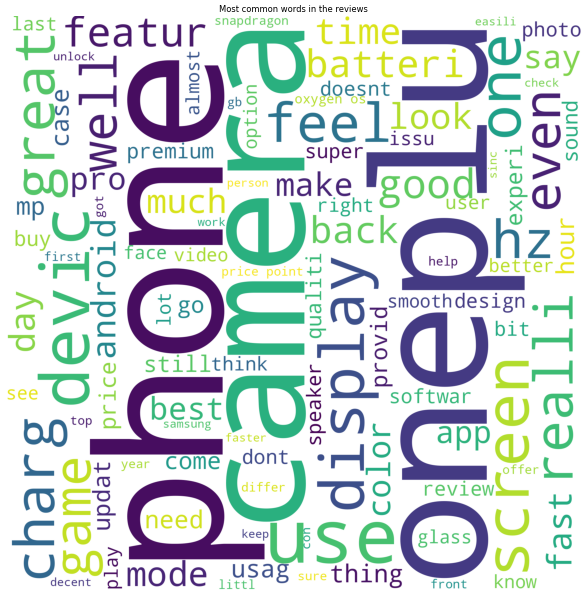

In [48]:
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(rv['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [49]:
from textblob import TextBlob
rv['sentiment_score'] = rv['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
rv[['Reviews','sentiment_score']].head()


,Reviews,sentiment_score
0,design familiar face dash newlet start design user older oneplu phone instantli recogn front side phone teardrop notch compani provid everi phone sinc oneplu honestli doesnt bother notchless design would appreci that reserv pro modelbut here big twist round triplecamera layout rememb motorola that exactli oneplu look like tripl len carv right well triplelen system doesnt help best help distinguish rest lineup worst stick liter like sore thumb that say havent grown given oneplu pro predict design get ask oneplu make look like thisth phone sport singl usbc port use charg use warp charg latest updat charg technolog allow phone charg minut that advertis charger realli work fast wireless charg would appreci im happi decent fast wire charg good flip side headphon jack know shocker smartphon ...,0.179126
1,use mi past year love softwar experi knew someth lack hardwar endi decid switch real flagship grade phone around k mark like se pixel almost bought either one pic oneplu teas onlin oneplusth design opt attent immedi decid wait itnot much review comparison video avail first sale blown away sheer look instantli bought oneplu soon went sale th trust never regret decis choos oneplusi classifi review categori wisedesign design look fabul eleg right word frost silver colour matt frost glass back circular camera look dope fingerprint magnet unlik previou mirror finishesinhand phone taller oneplu comparison tad thinner feel lighter overal inhand feel great due curvedback glass narrow width even hold without case doesnt slip feel premium surecamera tripl camera setup seriou upgrad previou onepl...,0.122917
2,oneplu excel devic differ oneplu could name instead tbut cannot beat oneplu pro read pro mid con verdictpro posit design oneplu look premium time master design piec earlier camera bump ugli look beauti due circular placement look premium due mattefinish well suit kind peopl weight thick devic doesnt feel heavi due balanc weight manag easi handl due slim mm thick processor devic host world fastest processor snapdragon chipset processor everyth buttersmooth alway flagship area ui smartphon user interfac simpl power oneplu devic oxygen ui alway king ui batteri optimis latest oxygen latest android provid nice batteri backup sound along loud dolbi atmo degre revolv sound effect realli excel clariti amaz ram ram manag alway good oneplu devic one need worri oxygen os handl ram even base varia...,0.186115
3,use devic sinc launch ie octob short review confid say even phone markconsid price point due processor hz screenyou see differencefast chargingi say futur proof got thing need water resist wireless charg need flat display aspect ratioit sure feel like premium phonedetail reviewbodi gorilla glass front back bodi perfect combin make smartphon feel premium oneplu excel depart side portion made anodis aluminium add premium feel kind person awar phone drop itthen case isneed even back use without case pure taken box frost matt glass backfingerprint visibl often grey colour phone blue thinit would great camera bump present actual need mention jerri rig everyth video phone teardowncamera kind person like vivid colour photous stock camera take superb photosboth daylight nightthank dedic nights...,0.204402
4,updat current almost year devic still go strong sign slow kind perform deterior last geekbench score day got mean oxygen os still optim perfectli drawback devic fingerprint reader slowli start forget finger doesnt recogn finger enrolledupd got new updat oxygen os issu game mode gonebeen use day let say first great devic realli realli glad bought samsung note review broken pro con listproscom preappli screen guard transpar silicon case boxa alway cabl qualiti great charger well builtdisplay qualiti great spec sheet hdr certifi display provid gorgeou color great view experienceinhand feel also great devic weight doesnt make heavi light useth back glass slipperi slipperi previou oneplu devicesi big hand easili reach far co

In [50]:
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [51]:
rv['sentiment'] = rv['sentiment_score'].apply(lambda x:sentiment_category(x))

In [52]:
rv.head()

,Reviews,sentiment_score,sentiment
0,design familiar face dash newlet start design user older oneplu phone instantli recogn front side phone teardrop notch compani provid everi phone sinc oneplu honestli doesnt bother notchless design would appreci that reserv pro modelbut here big twist round triplecamera layout rememb motorola that exactli oneplu look like tripl len carv right well triplelen system doesnt help best help distinguish rest lineup worst stick liter like sore thumb that say havent grown given oneplu pro predict design get ask oneplu make look like thisth phone sport singl usbc port use charg use warp charg latest updat charg technolog allow phone charg minut that advertis charger realli work fast wireless charg would appreci im happi decent fast wire charg good flip side headphon jack know shocker smartphon ...,0.179126,Neutral
1,use mi past year love softwar experi knew someth lack hardwar endi decid switch real flagship grade phone around k mark like se pixel almost bought either one pic oneplu teas onlin oneplusth design opt attent immedi decid wait itnot much review comparison video avail first sale blown away sheer look instantli bought oneplu soon went sale th trust never regret decis choos oneplusi classifi review categori wisedesign design look fabul eleg right word frost silver colour matt frost glass back circular camera look dope fingerprint magnet unlik previou mirror finishesinhand phone taller oneplu comparison tad thinner feel lighter overal inhand feel great due curvedback glass narrow width even hold without case doesnt slip feel premium surecamera tripl camera setup seriou upgrad previou onepl...,0.122917,Neutral
2,oneplu excel devic differ oneplu could name instead tbut cannot beat oneplu pro read pro mid con verdictpro posit design oneplu look premium time master design piec earlier camera bump ugli look beauti due circular placement look premium due mattefinish well suit kind peopl weight thick devic doesnt feel heavi due balanc weight manag easi handl due slim mm thick processor devic host world fastest processor snapdragon chipset processor everyth buttersmooth alway flagship area ui smartphon user interfac simpl power oneplu devic oxygen ui alway king ui batteri optimis latest oxygen latest android provid nice batteri backup sound along loud dolbi atmo degre revolv sound effect realli excel clariti amaz ram ram manag alway good oneplu devic one need worri oxygen os handl ram even base varia...,0.186115,Neutral
3,use devic sinc launch ie octob short review confid say even phone markconsid price point due processor hz screenyou see differencefast chargingi say futur proof got thing need water resist wireless charg need flat display aspect ratioit sure feel like premium phonedetail reviewbodi gorilla glass front back bodi perfect combin make smartphon feel premium oneplu excel depart side portion made anodis aluminium add premium feel kind person awar phone drop itthen case isneed even back use without case pure taken box frost matt glass backfingerprint visibl often grey colour phone blue thinit would great camera bump present actual need mention jerri rig everyth video phone teardowncamera kind person like vivid colour photous stock camera take superb photosboth daylight nightthank dedic nights...,0.204402,Neutral
4,updat current almost year devic still go strong sign slow kind perform deterior last geekbench score day got mean oxygen os still optim perfectli drawback devic fingerprint reader slowli start forget finger doesnt recogn finger enrolledupd got new updat oxygen os issu game mode gonebeen use day let say first great devic realli realli glad bought samsung note review broken pro con listproscom preappli screen guard transpar silicon case boxa alway cabl qualiti great charger well builtdisplay qualiti great spec sheet hdr certifi display provid gorgeou color great view experienceinhand feel also great devic weight doesnt make heavi light useth back glass slipperi slipperi previou on

In [53]:
rv['sentiment'].value_counts()

Neutral    10
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

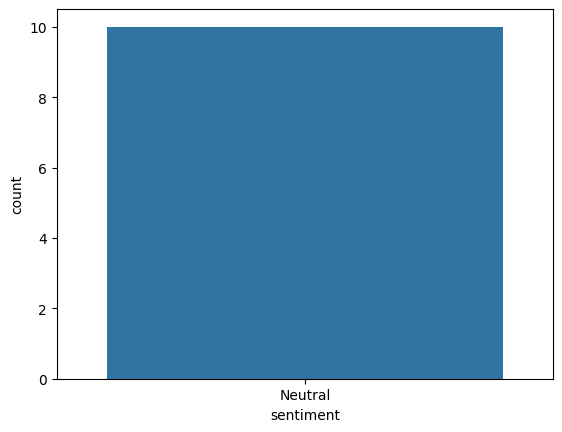

In [54]:
sns.countplot(x=rv['sentiment'])